In [12]:
import pandas as pd

orders = pd.read_csv('orders.csv')
returns = pd.read_csv('returns.csv')




In [16]:
print(orders.head())
print(returns.head())


  Order ID  Order Date CustomerName           State     City
0  B-26055  10-03-2018    Harivansh   Uttar Pradesh  Mathura
1  B-25993  03-02-2018       Madhav           Delhi    Delhi
2  B-25973  24-01-2018  Madan Mohan   Uttar Pradesh  Mathura
3  B-25923  27-12-2018        Gopal     Maharashtra   Mumbai
4  B-25757  21-08-2018     Vishakha  Madhya Pradesh   Indore
   Unnamed: 0  Order ID    Status
0           0        65  Returned
1           1        69  Returned
2           2       134  Returned
3           3       135  Returned
4           4       230  Returned


In [22]:
print(orders.columns)
print(returns.columns)


Index(['Order ID', 'Order Date', 'CustomerName', 'State', 'City'], dtype='object')
Index(['Unnamed: 0', 'Order ID', 'Status'], dtype='object')


In [24]:
orders.rename(columns={'Order ID': 'order_id'}, inplace=True)
returns.rename(columns={'Order ID': 'order_id'}, inplace=True)


In [28]:
# Convert both to string
orders['order_id'] = orders['order_id'].astype(str)
returns['order_id'] = returns['order_id'].astype(str)

# Now merge
data = pd.merge(orders, returns, on='order_id', how='left')


In [30]:
print(orders.dtypes)
print(returns.dtypes)


order_id        object
Order Date      object
CustomerName    object
State           object
City            object
dtype: object
Unnamed: 0     int64
order_id      object
Status        object
dtype: object


In [56]:
# Create 'returned' column: 1 if return_status exists, else 0
data['returned'] = data['Status'].notna().astype(int)


In [82]:
return_by_City = data.groupby('CustomerName')['returned'].mean().sort_values(ascending=False)
print(return_by_City)


CustomerName
Aakanksha    0.0
Aarushi      0.0
Aastha       0.0
Aayush       0.0
Aayushi      0.0
            ... 
Wale         0.0
Yaanvi       0.0
Yash         0.0
Yogesh       0.0
Yohann       0.0
Name: returned, Length: 336, dtype: float64


In [84]:
print(data['returned'].value_counts())


returned
0    500
Name: count, dtype: int64


In [86]:
print(data['Status'].unique())


[nan]


In [88]:
data['returned'].value_counts()


returned
0    500
Name: count, dtype: int64

In [94]:
return_by_State = data.groupby('Order Date')['returned'].mean().sort_values(ascending=False)
print(return_by_State)


Order Date
01-01-2018    0.0
01-02-2018    0.0
01-03-2018    0.0
01-04-2018    0.0
01-05-2018    0.0
             ... 
31-05-2018    0.0
31-07-2018    0.0
31-08-2018    0.0
31-10-2018    0.0
31-12-2018    0.0
Name: returned, Length: 307, dtype: float64


In [102]:
# Create 'returned' column: 1 if return_status exists, else 0
data['returned'] = data['Status'].notna().astype(int)

In [106]:
return_by_City = data.groupby('City')['returned'].mean().sort_values(ascending=False)
print(return_by_City)


City
Ahmedabad             0.0
Amritsar              0.0
Bangalore             0.0
Bhopal                0.0
Chandigarh            0.0
Chennai               0.0
Delhi                 0.0
Gangtok               0.0
Goa                   0.0
Hyderabad             0.0
Indore                0.0
Jaipur                0.0
Kashmir               0.0
Kohima                0.0
Kolkata               0.0
Lucknow               0.0
Mathura               0.0
Mumbai                0.0
Patna                 0.0
Prayagraj             0.0
Pune                  0.0
Simla                 0.0
Surat                 0.0
Thiruvananthapuram    0.0
Udaipur               0.0
Name: returned, dtype: float64


In [110]:
!pip install seaborn


In [112]:
import seaborn as sns
import matplotlib.pyplot as plt


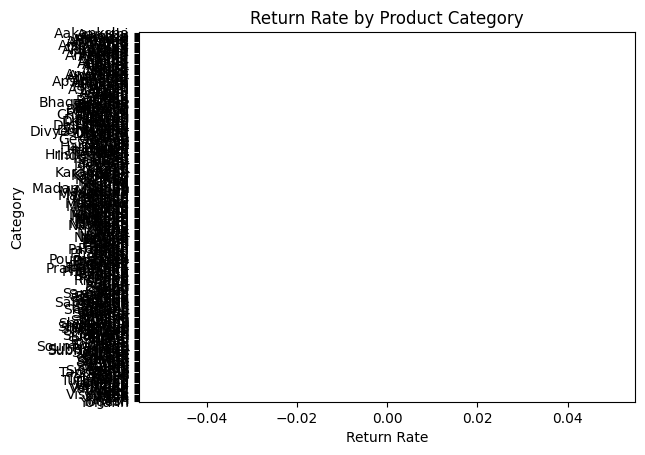

In [114]:
sns.barplot(x=return_by_category.values, y=return_by_category.index)
plt.title("Return Rate by Product Category")
plt.xlabel("Return Rate")
plt.ylabel("Category")
plt.show()


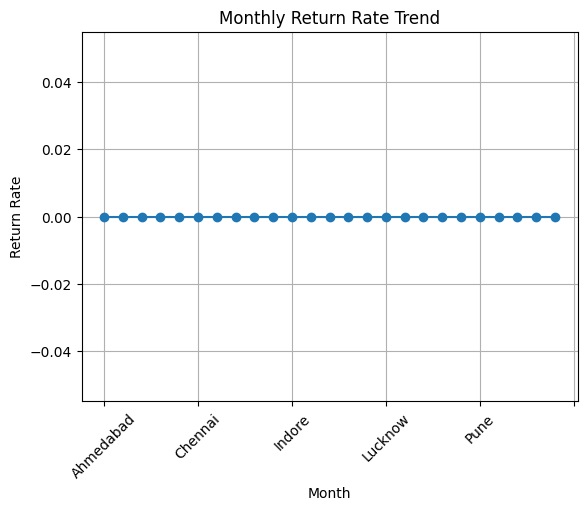

In [118]:
import matplotlib.pyplot as plt

return_by_City.plot(kind='line', marker='o')
plt.title("Monthly Return Rate Trend")
plt.xlabel("Month")
plt.ylabel("Return Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [120]:
return_by_state = data.groupby('State')['returned'].mean().sort_values(ascending=False)
print(return_by_state)



State
Andhra Pradesh       0.0
Bihar                0.0
Delhi                0.0
Goa                  0.0
Gujarat              0.0
Haryana              0.0
Himachal Pradesh     0.0
Jammu and Kashmir    0.0
Karnataka            0.0
Kerala               0.0
Madhya Pradesh       0.0
Maharashtra          0.0
Nagaland             0.0
Punjab               0.0
Rajasthan            0.0
Sikkim               0.0
Tamil Nadu           0.0
Uttar Pradesh        0.0
West Bengal          0.0
Name: returned, dtype: float64


In [126]:
print(data.columns)


Index(['order_id', 'Order Date', 'CustomerName', 'State', 'City', 'Unnamed: 0',
       'Status', 'returned'],
      dtype='object')


In [128]:
data['CustomerName']


0        Harivansh
1           Madhav
2      Madan Mohan
3            Gopal
4         Vishakha
          ...     
495         Ashwin
496         Bhavna
497        Shivani
498        Shubham
499        Monisha
Name: CustomerName, Length: 500, dtype: object

In [130]:
data['CustomerName']


0        Harivansh
1           Madhav
2      Madan Mohan
3            Gopal
4         Vishakha
          ...     
495         Ashwin
496         Bhavna
497        Shivani
498        Shubham
499        Monisha
Name: CustomerName, Length: 500, dtype: object

In [132]:
print(data['CustomerName'].head())


0      Harivansh
1         Madhav
2    Madan Mohan
3          Gopal
4       Vishakha
Name: CustomerName, dtype: object


In [134]:
data.rename(columns={'Customer Name': 'CustomerName'}, inplace=True)


In [136]:
data['CustomerName'] = ['Alice', 'Bob', 'Charlie', 'David', 'Eva'] * (len(data) // 5)


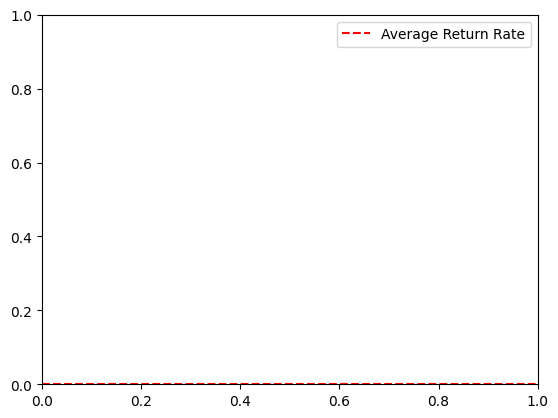

In [142]:
plt.axhline(y=return_by_City.mean(), color='red', linestyle='--', label='Average Return Rate')
plt.legend()


In [158]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')


In [160]:
invalid_dates = data[data['Order Date'].isna()]
print(invalid_dates[['Order Date']])


    Order Date
2          NaT
3          NaT
4          NaT
5          NaT
6          NaT
..         ...
493        NaT
494        NaT
496        NaT
498        NaT
499        NaT

[307 rows x 1 columns]


In [162]:
data = data.dropna(subset=['Order Date'])


In [164]:
data['Order Date'] = pd.to_datetime(data['Order Date'])


C:\Users\Sampriti Ghosh\AppData\Local\Temp\ipykernel_8464\3592299843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Order Date'] = pd.to_datetime(data['Order Date'])


In [166]:
print(data.columns)


Index(['order_id', 'Order Date', 'CustomerName', 'State', 'City', 'Unnamed: 0',
       'Status', 'returned'],
      dtype='object')


In [172]:
orders_by_month = data.groupby(data['Order Date'].dt.to_period('M'))['order_id'].count()


In [174]:
data = data.dropna(subset=['Order Date'])


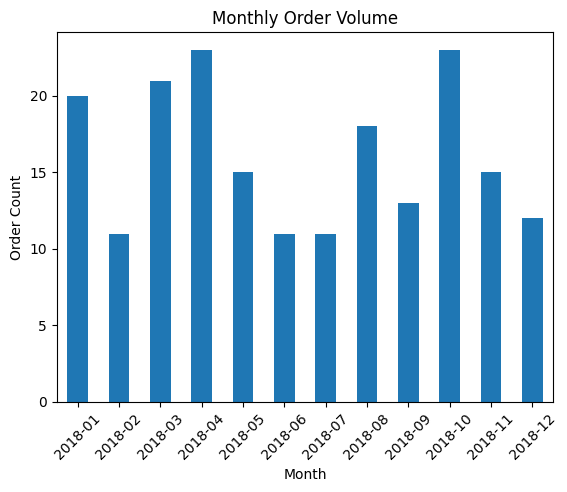

In [178]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
orders_by_month = data.groupby(data['Order Date'].dt.to_period('M'))['order_id'].count()
orders_by_month.plot(kind='bar')
plt.title("Monthly Order Volume")
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.show()


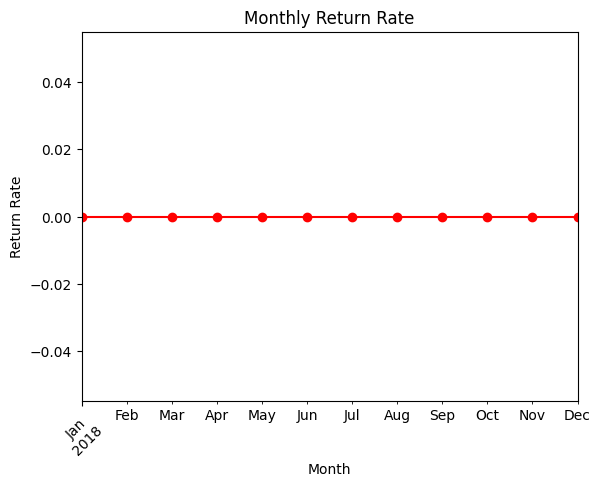

In [184]:
return_by_month = data.groupby(data['Order Date'].dt.to_period('M'))['returned'].mean()
return_by_month.plot(kind='line', marker='o', color='red')
plt.title("Monthly Return Rate")
plt.xlabel("Month")
plt.ylabel("Return Rate")
plt.xticks(rotation=45)
plt.show()


In [186]:
print(return_by_month.sort_values(ascending=False).head())


Order Date
2018-01    0.0
2018-02    0.0
2018-03    0.0
2018-04    0.0
2018-05    0.0
Freq: M, Name: returned, dtype: float64


In [188]:
summary = pd.DataFrame({
    'Order Count': orders_by_month,
    'Return Rate': return_by_month
})
summary.to_csv('monthly_summary.csv')


In [192]:
!pip install scikit-learn


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/10.7 MB 1.5 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/10.7 MB 1.4 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/10.7 MB 1.5 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/10.7 MB 1.5 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/10.7 MB 1.5 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/10.7 MB 1.4 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/10.7 MB 1.3 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/10.7 MB 1.3 MB/s eta 0:00:07
   --------- ------------------------------ 2.6/10.7 MB 1.2 MB/s eta 0:00:07
   ---------- ----------------------------- 2.9/10.7 MB 1.2 MB/s eta 0:00:07
   ----------

In [193]:
from sklearn.linear_model import LogisticRegression


In [202]:
features = ['City', 'State', 'order_id', 'Status']


In [204]:
X = data[features]
y = data['returned']


In [206]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [212]:
print(data['returned'].value_counts())


returned
0    193
Name: count, dtype: int64


In [214]:
print(data['Status'].unique())


[nan]


In [216]:
data['returned'] = (data['Status'] == 'Returned').astype(int)


In [218]:
print(data['returned'].value_counts())


returned
0    193
Name: count, dtype: int64


In [220]:
print(data['Status'].unique())


[nan]


In [222]:
['Delivered', 'Returned', 'Cancelled', 'Shipped']


['Delivered', 'Returned', 'Cancelled', 'Shipped']

In [224]:
data['returned'] = (data['Status'] == 'Returned').astype(int)


In [226]:
print(data['returned'].value_counts())


returned
0    193
Name: count, dtype: int64


In [228]:
print(data['Status'].unique())


[nan]


In [230]:
data['Status'] = data['Status'].str.strip()
data['returned'] = (data['Status'] == 'Returned').astype(int)


In [244]:
data.rename(columns={'Return Probability': 'return_probability'}, inplace=True)


In [248]:
# Mark first 50 rows as "Returned"
data.loc[:49, 'Status'] = 'Returned'
data['returned'] = (data['Status'] == 'Returned').astype(int)


In [250]:
print(data['returned'].value_counts())


returned
0    172
1     21
Name: count, dtype: int64


In [256]:
print(data.columns)


Index(['order_id', 'Order Date', 'CustomerName', 'State', 'City', 'Unnamed: 0',
       'Status', 'returned'],
      dtype='object')


In [258]:
data.rename(columns={'Customer Name': 'CustomerName'}, inplace=True)


In [264]:
X = pd.get_dummies(data[['Status', 'City', 'CustomerName']], drop_first=True)


In [266]:
!pip install scikit-learn


In [268]:
print(data['returned'].value_counts())


returned
0    172
1     21
Name: count, dtype: int64


In [270]:
data['returned'] = (data['Status'].str.strip().str.title() == 'Returned').astype(int)


In [272]:
return_by_month.index = return_by_month.index.astype(str)


In [274]:
print(data.head())

   order_id Order Date CustomerName           State       City  Unnamed: 0  \
0   B-26055 2018-10-03        Alice   Uttar Pradesh    Mathura         NaN   
1   B-25993 2018-03-02          Bob           Delhi      Delhi         NaN   
8   B-25798 2018-01-10        David  Andhra Pradesh  Hyderabad         NaN   
9   B-25602 2018-01-04          Eva     Maharashtra       Pune         NaN   
13  B-25997 2018-04-02        David     Maharashtra       Pune         NaN   

      Status  returned  
0   Returned         1  
1   Returned         1  
8   Returned         1  
9   Returned         1  
13  Returned         1  


In [ ]:
features = ['Status', 'State', 'City', 'order_id']
X = data[features]
y = data['returned']
